In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 200,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.2,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\Ai-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 3
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.8395061728395061, Loss: 0.6917125560619213
Checkpoint 20, Accuracy: 0.845679012345679, Loss: 0.6516527952971282
Checkpoint 30, Accuracy: 0.8518518518518519, Loss: 0.5165996198300962
Checkpoint 40, Accuracy: 0.9382716049382716, Loss: 0.4423080020480686
Checkpoint 50, Accuracy: 0.9012345679012346, Loss: 0.4033666893287941
Checkpoint 60, Accuracy: 0.9135802469135802, Loss: 0.3836229112413194
Checkpoint 70, Accuracy: 0.9567901234567902, Loss: 0.3239946718569155
Checkpoint 80, Accuracy: 0.9382716049382716, Loss: 0.29805430659541376
Checkpoint 90, Accuracy: 0.9382716049382716, Loss: 0.23714627159966362
Checkpoint 100, Accuracy: 0.9691358024691358, Loss: 0.19461001290215385
Checkpoint 110, Accuracy: 0.9691358024691358, Loss: 0.1806356112162272
Checkpoint 120, Accuracy: 0.9629629629629629, Loss: 0.15987120734320748
Checkpoint 130, Accuracy: 0.9567901234567902, Loss: 0.1690912953129521
Checkpoint 140, Accuracy: 0.9567901234567902, Loss: 0.1609241697523329
Checkpoint 1

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

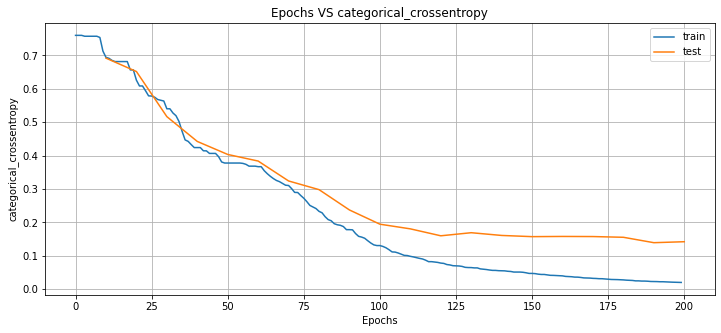

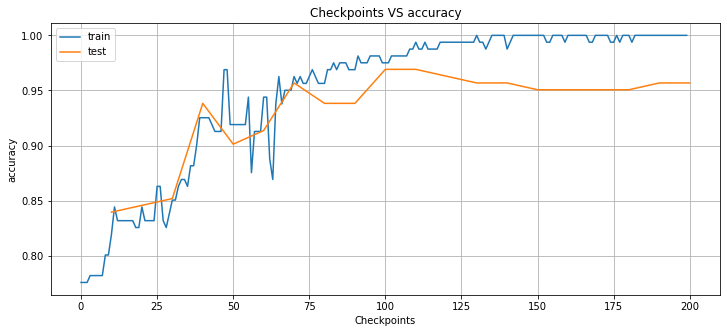

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [0.9848605  0.01403763 0.00110191]
[1. 0. 0.] <-> [0.7968947  0.00218756 0.20091768]
[1. 0. 0.] <-> [0.99404174 0.0029131  0.00304517]
[1. 0. 0.] <-> [9.9476719e-01 4.5061777e-03 7.2664663e-04]
[1. 0. 0.] <-> [9.9631208e-01 2.9727167e-03 7.1518612e-04]
[0. 0. 1.] <-> [1.0781918e-01 3.7200749e-04 8.9180881e-01]
[0. 1. 0.] <-> [6.6687507e-03 9.9299735e-01 3.3389940e-04]
[0. 1. 0.] <-> [6.6634854e-03 9.9300522e-01 3.3129004e-04]
[0. 0. 1.] <-> [3.2437910e-04 1.1200133e-04 9.9956363e-01]
[1. 0. 0.] <-> [0.9946315  0.0021897  0.00317874]
[1. 0. 0.] <-> [0.99277675 0.00410841 0.00311477]
[0. 0. 1.] <-> [9.9560916e-03 1.1250238e-04 9.8993134e-01]
[1. 0. 0.] <-> [9.9712616e-01 1.9737601e-03 9.0003660e-04]
[1. 0. 0.] <-> [0.9950079  0.00265126 0.00234085]
[0. 1. 0.] <-> [0.49140108 0.5064489  0.00215004]
[0. 1. 0.] <-> [6.7143668e-03 9.9294680e-01 3.3886824e-04]
[1. 0. 0.] <-> [0.76216733 0.17394663 0.06388603]
[1. 0. 0.] <-> [0.98942727 0.005324   0.00524871]
[1. 0. 0.] <-> [0.9

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.8395061728395061, 'mean_square_error': 0.3608796612856001, 'categorical_crossentropy': 0.6917125560619213, 'essential_metrics': {0: {'tp_hit': 77, 'fp_hit': 25, 'tn_hit': 5, 'fn_hit': 1}, 1: {'tp_hit': 5, 'fp_hit': 1, 'tn_hit': 91, 'fn_hit': 11}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 10} 


{'accuracy': 0.845679012345679, 'mean_square_error': 0.36593477978608085, 'categorical_crossentropy': 0.6516527952971282, 'essential_metrics': {0: {'tp_hit': 68, 'fp_hit': 15, 'tn_hit': 15, 'fn_hit': 10}, 1: {'tp_hit': 15, 'fp_hit': 10, 'tn_hit': 82, 'fn_hit': 1}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_hit': 14}}, 'checkpoint': 20} 


{'accuracy': 0.8518518518518519, 'mean_square_error': 0.30971997852595506, 'categorical_crossentropy': 0.5165996198300962, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 24, 'tn_hit': 6, 'fn_hit': 0}, 1: {'tp_hit': 6, 'fp_hit': 0, 'tn_hit': 92, 'fn_hit': 10}, 2: {'tp_hit': 0, 'fp_hit': 0, 'tn_hit': 94, 'fn_

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.25132027 -3.          1.4467369   1.990253    2.9192295 ]
 bias: -1.6802924871444702

Neuron 1: weights:
[-1.9228923  2.7471993  2.747163   2.6807084  3.       ]
 bias: -0.11923780292272568

Neuron 2: weights:
[-2.1631558  3.         3.        -0.5286361 -1.3177147]
 bias: -2.848231077194214

Neuron 3: weights:
[-0.18349865  3.          1.3097779  -0.42859897 -3.        ]
 bias: 2.610201597213745

$
Layer 2
Neuron 0: weights:
[-2.3898406 -2.4255283 -3.         3.       ]
 bias: 2.3582940101623535

Neuron 1: weights:
[-3.         2.8865309  3.         2.0503433]
 bias: -3.0

Neuron 2: weights:
[ 3.         2.2074716 -3.        -3.       ]
 bias: 0.7237650752067566

$

